In [1]:
import numpy as np
import pandas as pd
import warnings

In [2]:
warnings.filterwarnings('ignore')

# Get the Dataset

In [10]:
columns_name = ["user_id","item_id","rating","timesatmp"]
df = pd.read_csv("../data/ml-100k/u.data",sep="\t",names=columns_name)

In [11]:
df.head()

,user_id,item_id,rating,timesatmp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [ ]:
# df.describe()

In [13]:
df.shape

(100000, 4)

In [14]:
 df.rating.value_counts()

4    34174
3    27145
5    21201
2    11370
1     6110
Name: rating, dtype: int64

In [38]:
df.item_id.nunique()

1682

In [16]:
df.user_id.unique().shape

(943,)

In [25]:
movies_title = pd.read_csv("../data/ml-100k/u.item",sep="\|",header=None)[[0,1]]

In [27]:
movies_title.columns = ["item_id","title"]
movies_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [30]:
df = pd.merge(df,movies_title,on = "item_id")

In [124]:
df.tail()

,user_id,item_id,rating,timesatmp,title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


## Exploratory Data Analysis

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
# sns.barplot(x="item_id",y ="rating",data=df)

In [41]:
avg_rat = df.groupby('title').mean()

In [49]:
avg_rat = avg_rat.rating

In [51]:
avg_rat.index[0]

"'Til There Was You (1997)"

In [52]:
avg_rat.sort_values(ascending=False)

title
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de décembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: rating, Length: 1664, dtype: float64

In [55]:
no_of_reviews = df.groupby('title').count()

In [66]:
no_of_reviews['user_id'].sort_values(ascending=False)

title
Star Wars (1977)                              583
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
Á köldum klaka (Cold Fever) (1994)              1
Name: user_id, Length: 1664, dtype: int64

In [70]:
avg_rat["'Til There Was You (1997)"]

2.3333333333333335

In [71]:
print(type(avg_rat))

<class 'pandas.core.series.Series'>


In [84]:
ratings = pd.DataFrame(avg_rat)

In [128]:
ratings

,rating,num_rat
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [85]:
ratings["num_rat"] = pd.DataFrame(no_of_reviews['rating'])

In [129]:
t =ratings.sort_values(by="num_rat",ascending=False)

In [130]:
t[(t.rating>4) & (t.num_rat>100)]

,rating,num_rat
title,,
Star Wars (1977),4.358491,583
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Raiders of the Lost Ark (1981),4.252381,420
"Godfather, The (1972)",4.283293,413
...,...,...
As Good As It Gets (1997),4.196429,112
"Close Shave, A (1995)",4.491071,112
Mr. Smith Goes to Washington (1939),4.123810,105


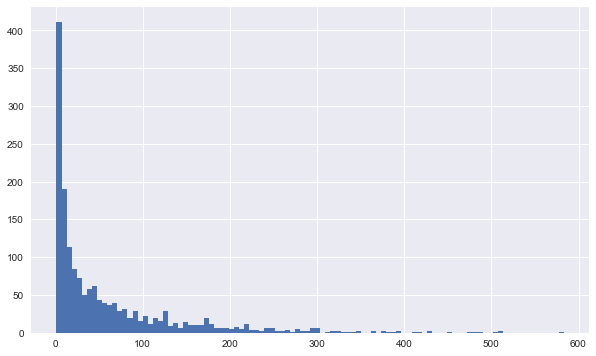

In [107]:
plt.figure(figsize=(10,6))
plt.hist(ratings.num_rat,bins= 100)
plt.show()

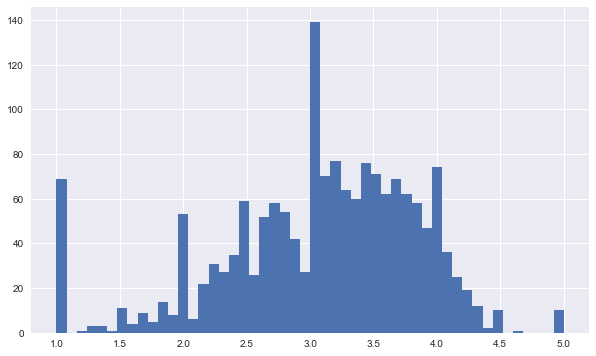

In [106]:
plt.figure(figsize=(10,6))
plt.hist(ratings.rating,bins=50)
plt.show()

In [105]:
plt.style.use("seaborn")

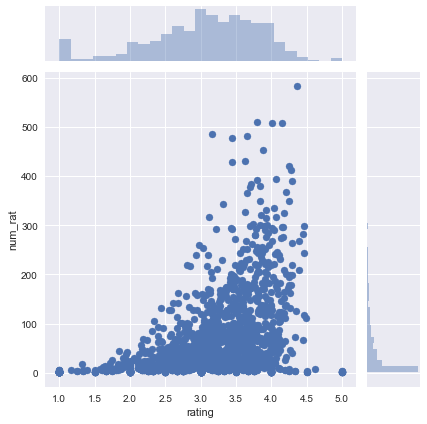

In [109]:
sns.jointplot(x= "rating",y = "num_rat",data=ratings)
plt.show()

# Creating Movie Recommendation

In [111]:
df.head()

,user_id,item_id,rating,timesatmp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [114]:
# print(type(df))

In [120]:
movie_mat = df.pivot_table(index="user_id",columns="title",values="rating")

In [123]:
# movie_mat.head()

In [134]:
star_war_user_ratings   = movie_mat['Star Wars (1977)']
star_war_user_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [136]:
 star_war_smilar = movie_mat.corrwith(star_war_user_ratings)

In [149]:
star_war_corr = pd.DataFrame(star_war_smilar,columns=["Correlation"])

In [150]:
star_war_corr = star_war_corr.dropna()

In [151]:
star_war_corr.sort_values("Correlation",ascending=False)

,Correlation
title,
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
Stripes (1981),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
...,...
Roseanna's Grave (For Roseanna) (1997),-1.0
For Ever Mozart (1996),-1.0
American Dream (1990),-1.0


In [152]:
ratings

,rating,num_rat
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [155]:
 star_war_corr= star_war_corr.join(ratings)

In [156]:
star_war_corr

,Correlation,rating,num_rat
title,,,
'Til There Was You (1997),0.872872,2.333333,9
1-900 (1994),-0.645497,2.600000,5
101 Dalmatians (1996),0.211132,2.908257,109
12 Angry Men (1957),0.184289,4.344000,125
187 (1997),0.027398,3.024390,41
...,...,...,...
Young Guns (1988),0.186377,3.207921,101
Young Guns II (1990),0.228615,2.772727,44
"Young Poisoner's Handbook, The (1995)",-0.007374,3.341463,41


In [160]:
star_war_corr[(star_war_corr.num_rat>50)].sort_values("Correlation",ascending =False).head(15)

,Correlation,rating,num_rat
title,,,
Star Wars (1977),1.000000,4.358491,583
"Empire Strikes Back, The (1980)",0.747981,4.204360,367
Return of the Jedi (1983),0.672556,4.007890,507
Raiders of the Lost Ark (1981),0.536117,4.252381,420
Giant (1956),0.488093,3.745098,51
"Life Less Ordinary, A (1997)",0.411638,3.075472,53
Austin Powers: International Man of Mystery (1997),0.377433,3.246154,130
"Sting, The (1973)",0.367538,4.058091,241
Indiana Jones and the Last Crusade (1989),0.350107,3.930514,331


# Final awesome function

In [185]:
def predict_movies(movie_name):
    movie_ratings   = movie_mat[movie_name]
    movie_smilar = movie_mat.corrwith(movie_ratings)
    movie_corr = pd.DataFrame(movie_smilar,columns=["Correlation"])
    movie_corr=movie_corr.dropna()
    movie_corr = movie_corr.join(ratings)
#     print(movie_corr.head())
    predictions = movie_corr[movie_corr.num_rat>50].sort_values("Correlation",ascending=False)
    return predictions

In [186]:
prediction = predict_movies("Crash (1996)")
# movie_corr[movie_corr.num_rat>50].sort_values("Correlation",ascending=False).head(15)

In [187]:
prediction.head()

,Correlation,rating,num_rat
title,,,
Crash (1996),1.000000,2.546875,128
"Quiet Man, The (1952)",1.000000,4.029851,67
"Christmas Carol, A (1938)",0.960769,4.057971,69
Manon of the Spring (Manon des sources) (1986),0.891133,4.120690,58
"39 Steps, The (1935)",0.888523,4.050847,59


In [188]:
prediction = predict_movies("Titanic (1997)")

In [190]:
prediction.head(15)

,Correlation,rating,num_rat
title,,,
Titanic (1997),1.000000,4.245714,350
"Adventures of Robin Hood, The (1938)",0.597532,3.791045,67
Mallrats (1995),0.580393,3.444444,54
Robin Hood: Men in Tights (1993),0.533114,2.589286,56
Manon of the Spring (Manon des sources) (1986),0.523459,4.120690,58
Weekend at Bernie's (1989),0.508548,2.616667,60
"River Wild, The (1994)",0.497600,3.143836,146
Six Degrees of Separation (1993),0.485077,3.770270,74
"Abyss, The (1989)",0.472103,3.589404,151
